In [1]:
from sklearn.datasets import load_files

In [2]:
train_structure = load_files('notMNIST_large', load_content=False)

In [4]:
train_structure

{'filenames': array(['notMNIST_large/I/VXBkYXRlIDIwIEl0YWxpYy50dGY=.png',
        'notMNIST_large/G/SG9iYnlIZWFkbGluZSBSZWd1bGFyLnR0Zg==.png',
        'notMNIST_large/A/QjV3aW5nZGluZ3MudHRm.png', ...,
        'notMNIST_large/C/QmxvY2sgQm9sZC50dGY=.png',
        'notMNIST_large/I/QnJvYWRzaWRlIE5vcm1hbC50dGY=.png',
        'notMNIST_large/F/UG95bnRlclRleHQtU2Fuc1JlZ3VsYXIub3Rm.png'],
       dtype='<U109'),
 'target_names': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 'target': array([8, 6, 0, ..., 2, 8, 5]),
 'DESCR': None}

In [7]:
input_files= {x: list() for x in range(10)}
for i in range(len(train_structure['target'])):
    input_files[train_structure['target'][i]].append(train_structure['filenames'][i])

In [53]:
from skimage.io import imread

def safe_read(path: str):
    try:
        return imread(path).flatten() 
    except ValueError:
        return None
        

In [70]:
def files_to_data(files: dict) -> dict:
    return {
        k: [x for x in (safe_read(fn) for fn in v) if x is not None]
        for k, v in files.items()
    }


In [ ]:
input_data = files_to_data(input_files)

In [61]:
import numpy as np
from itertools import chain

def sk_sample(dict_data: dict, size: int):
    return (
        np.array(tuple(chain(*(l[:size] for l in dict_data.values())))), 
        np.array(tuple(chain(*[[x] * size for x in range(10)])))
    )

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [220]:
train_X, train_y = sk_sample(input_data, 1000)
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)

In [227]:
model = LogisticRegression(max_iter=10000, C=0.001).fit(train_X, train_y)

In [137]:
predict_structure = load_files('notMNIST_small', load_content=False)

In [69]:
predict_files= {x: list() for x in range(10)}
for i in range(len(predict_structure['target'])):
    predict_files[predict_structure['target'][i]].append(predict_structure['filenames'][i])

In [72]:
predict_data = files_to_data(predict_files)

In [199]:
predict_real_X, predict_real_y = sk_sample(predict_data, 1872)

In [232]:
sample_sizes = [50, 100, 1000, 50000]
err = []
for sample_size in sample_sizes:
    print(sample_size)
    train_X, train_y = sk_sample(input_data, sample_size)
    scaler = StandardScaler().fit(train_X)
    train_X = scaler.transform(train_X)
    model = LogisticRegression(max_iter=10000, C=0.001).fit(train_X, train_y)
    predict_X = scaler.transform(predict_real_X)
    predicted_y = model.predict(predict_X)
    err.append(np.sum(predicted_y != predict_real_y))
    print(err)

50
[2961]
100
[2961, 2632]
1000
[2961, 2632, 2088]
50000
[2961, 2632, 2088, 1866]


<IPython.core.display.Javascript object>


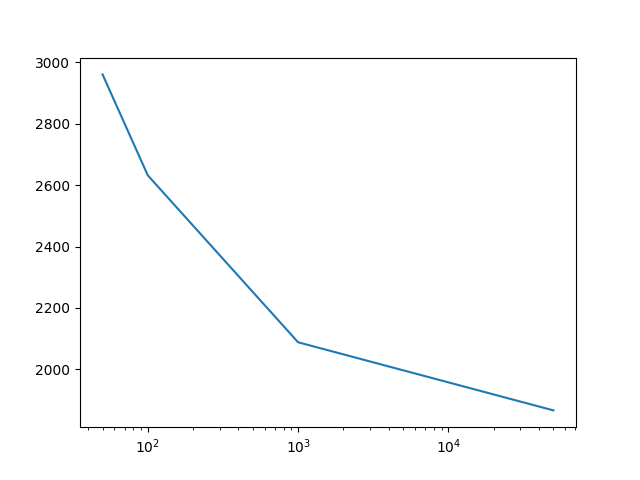

In [238]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(sample_sizes, err)
plt.xscale('log')
plt.show()